### Crossvalidation Example

In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot
import numpy as np

Using TensorFlow backend.


In [2]:
df = utils.get_dataset()

In [3]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [4]:
df = preprocessing.impute_income_KNN(df)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
X,y = utils.X_y_split(df)

### Crossvalidation on all models

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:66: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:3

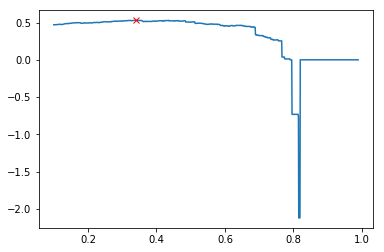

In [16]:
layers1 = [3]#,6,9,12]
neurons1 = [6]#,12,18,24]
optimizers1 = ["adam"]#, "rmsprop"]
initializers1 = ["uniform"]#, "he_normal", "he_uniform"]
loss_functions = ["mean_squared_error"]#, "binary_crossentropy"]
dropout_rates = [0.2]#, 0.35, 0.5, 0.65]


for layer1 in layers1:
    for neuron1 in neurons1:
        for optimizer1 in optimizers1:
            for initializer1 in initializers1:
                for loss_function in loss_functions:
                    for dropout_rate in dropout_rates:
                        models = {"KerasNN_not_fitted1" : KerasNN_not_fitted(n_layers=layer1, n_neurons=neuron1, optimizer=optimizer1, init=initializer1, loss=loss_function, r_dropout=dropout_rate)}
                        utils.Cross_Val_Models(models, X, y, sampling_technique=None, scaler=scaler)

In [ ]:
res

In [17]:
models = {
    "KerasNN_not_fitted" : KerasNN_not_fitted(),
    "GaussianNB" : GaussianNB(),
    "MultinomialNB" : MultinomialNB(),
    "ComplementNB" : ComplementNB(),
    "SVC" : SVC(), 
    "LinearSVC" : LinearSVC(),
    "LogisticRegression" : LogisticRegression(),
    "SGDClassifier" : SGDClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(criterion="gini", class_weight=None),
    "XGBClassifier" : XGBClassifier(colsample_by_tree=0.1,
                                  learning_rate=0.89,
                                  max_depth=8,
                               n_estimators=10000,
                                  eval_metric="auc",                                
                                  n_jobs=-1, silent=0, verbose=0),
    "MLPClassifier" : MLPClassifier(hidden_layer_sizes=(10), solver = "lbfgs", max_iter=1000, random_state=42),
    "LinearRegression" : LinearRegression()
}
models = {
    "KerasNN_not_fitted1" : KerasNN_not_fitted(n_layers=3, init="he_normal"),
    "KerasNN_not_fitted2" : KerasNN_not_fitted(n_neurons=6, init="he_normal"),
    "KerasNN_not_fitted3" : KerasNN_not_fitted(n_neurons=9, init="he_normal"),
    "KerasNN_not_fitted4" : KerasNN_not_fitted(n_neurons=12,init="he_normal")
}

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:66: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))
/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:66: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))
/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:66: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="he_normal")`
  model.add(layers.Dense(1, activation="sigmoid", init=init))
/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/ML_algorithms.py:66: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_in

In [9]:
seed=0
from imblearn import over_sampling
ros = over_sampling.RandomOverSampler(random_state=seed, ratio=0.5)
#resamp_x, resamp_y= ros.fit_resample(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype u

{'KerasNN_not_fitted1': 0.438,
 'KerasNN_not_fitted2': 0.457,
 'KerasNN_not_fitted3': 0.416,
 'KerasNN_not_fitted4': 0.462}

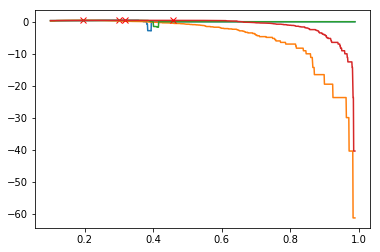

In [18]:
utils.Cross_Val_Models(models, X, y, sampling_technique=None, scaler=scaler)

In [ ]:
utils.cross_validation_average_results(GaussianNB(), X, y, scaler=scaler, sampling_technique=ros)

In [ ]:
models = {
    "GaussianNB" : GaussianNB(),
    "MultinomialNB" : MultinomialNB(),
    "ComplementNB" : ComplementNB(),
    "SVC" : SVC(), 
    "LinearSVC" : LinearSVC(),
    "LogisticRegression" : LogisticRegression(),
    "SGDClassifier" : SGDClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(criterion="gini", class_weight=None)
}

In [ ]:
utils.Cross_Val_Models(models, X, y, scaler, n_splits=5, sampling_technique=ros)

In [ ]:
utils.Cross_Val_Models(models, X, y, n_splits=5, scaler=scaler)

### Leave One out Cross Validation

In [ ]:
%%capture
for model in models.keys():
    y_predicted = utils.leave_one_out_cross_validation_average_results(models[model], X, y, n_splits=5,scaler=scaler)
    threshold = utils.max_threshold(y_predicted, y, threshold_range = (0.1, 0.99),iterations=1000, visualization=True)
    y_pred = utils.predict_with_threshold(y_predicted,threshold)
    results[model] = utils.profit_share(y_predicted, y)
print(results)

In [ ]:
results